### 03 Image correlation of EBSD IPF map and SEM image 
This notebook demonstrates the process for correlating EBSD IPF map with SEM image by manual feature registration. By correlating the two imaging modes, the scan distortion of EBSD map is minimized. Additionally, the EBSD orientation information is accurately linked to the corresponding stage positions. Therefore, by clicking on the correlated interactive map, the Eular angles, stage position can be easily retrieved, hence making the navigation more user friendly.

#### Load dependent packages

In [1]:
import os
from pathlib import Path
from openECCI import optimization

#### Load/locate the required data files
- A EBSD map file from the sample of interest (A EBSD file from an austenitic stainless steel sample is used here)
- A SEM image from the area that has been mapped by EBSD. This is usually a backscattered electron (BSE) image at a slightly lower magnification to provide grain contrast of the polycrystal sample.

In [2]:
fe_xmap_path = Path("../../openECCI-data/ebsd_map/")
fe_xmap_file = "20kv_26nA_15mm WD_4x4 bin_fcc_Fe Map.ctf"
fe_xmap_fname = os.path.join(fe_xmap_path, fe_xmap_file)

sem_path = Path("../../openECCI-data/fcc_fe/")
sem_file = "01_steel overview.tif"
sem_fname = os.path.join(sem_path, sem_file)

#### Instantiate a new ipf_image_correlation object and set two parameters as input. 

Input parameters for the ipf_image_correlation object are:<br>
- `sem_fname` the location of the overview SEM image file that has been mapped by EBSD
- `fe_xmap_fname` the location of the EBSD crystal map file

The information of the EBSD crystal map, e.g. the phase names etc., are summarized as output once the object is instantiated.

In [3]:
correlation = optimization.ipf_image_correlation(sem_fname, fe_xmap_fname)

Phase     Orientations         Name  Space group  Point group  Proper point group     Color
   -1      8358 (2.5%)  not_indexed         None         None                None         w
    1   322978 (97.5%)     Iron fcc        Fm-3m         m-3m                 432  tab:blue
Properties: bands, error, MAD, BC, BS
Scan unit: um


#### Get the EBSD ipf map image of a specified phase from crystal map file

The function `correlation.get_ipf_map` is to get the EBSD map from the orientation map file. Set the `phase_name` to one of the phase names in the output list above. By default, the variable `plot` is set to `True` to plot the EBSD IPF map with band contrast as overlay to highlight the grain boundaries. Set it to `False` to suppress the output.


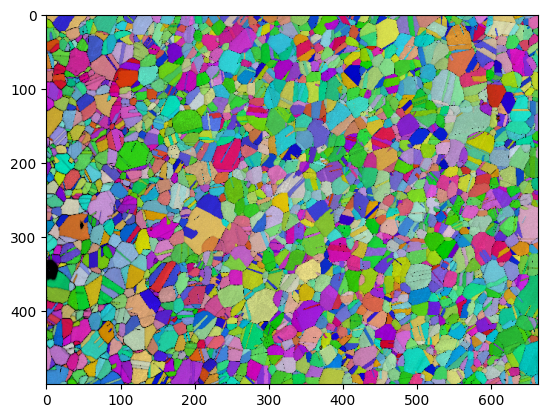

In [4]:
fe_ipf_map = correlation.get_ipf_map(phase_name="Iron fcc", plot=True)

#### Mark the common features in EBSD ipf map and SEM image
The process requires executing the next two cells so that two QT interactive windows will be opened for manually picking up registration points at common features. Because the registration points from the two images have to be one to one correspondent and stored in the same order. It is recommended to carry out the alignment procedure in the following steps:
- Run the next two cells to open up the two images side by side
- Locate the common features on the two images
- Double-click on the common feature in two images so that a marking point and a label number appear.
- Repeat the last step on other common features.
- It is recommended that the marked registration points provide a relatively uniform coverage of the EBSD ipf map to improve homographic transformation quality.

It is __important__ to add the IPython [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) `%matplotlib qt` before running the next two cells, so that the output images are shown in QT interactive windows. Images output `inline` will not be able to register the clicking points.

In [5]:
%matplotlib qt
# Pick points on the EBSD map image that are common to the SEM image
correlation.get_ipf_points()

In [6]:
# Pick points on the SEM image that are common to the EBSD map image
correlation.get_sem_points()

#### Save alignment registration points
Once a good coverage of alignment registration points are marked. The results, in form of two coordinate arrays, can be stored in a Python `pickle` file by using the function `ipf_image_correlation.save_alignment_points`. The stored alignment points can also be loaded by using `ipf_image_correlation.load_alignment_points`.

In [7]:
#correlation.save_alignment_points(save_path="alignment_points.pkl")

#### Load previous alignment registration points


In [8]:
correlation.load_alignment_points(load_path="alignment_points.pkl")

24 alignment points have been loaded.


#### Apply the correlation and display blended map
`ipf_image_correlation.process` function applies the homographic transformation to the EBSD ipf map and blend it with SEM image. By default, the blended image will be plotted but can be suppressed. The function also returns the `blended_ipf` map image as a `numpy.ndarry` together with the `inverse_transformation_matrix` for applying reverse calculation of coordinate from SEM image to IPF map.

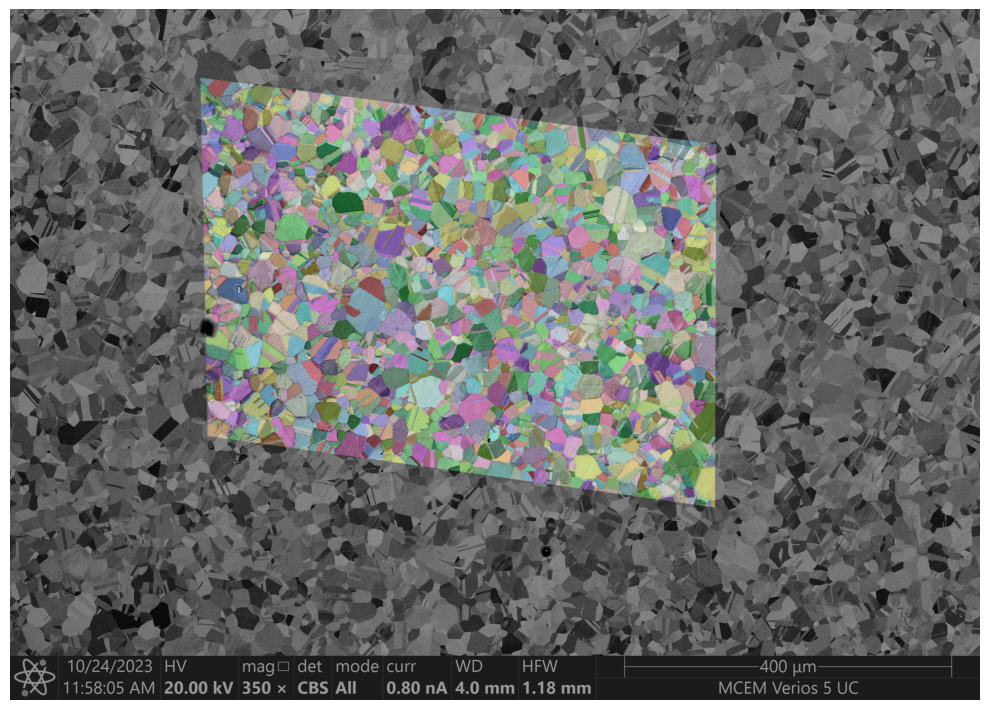

In [9]:
%matplotlib inline
blended_ipf, inverse_transformation_matrix = correlation.process(plot=True)